# Test the `calibration.py` file on Cesium 137

In [1]:
from calibration import calibrate, get_gamma_peaks, full_plot
from calibration import compton_peak, compton_edge, resolution
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'
%matplotlib inline

file = "spectrum\\Cs137_spectrum_range1000_14min-07-09-2023.txt" # File to be analyzed
reference_file = file

In [2]:
# First, calibrate
data = calibrate(file, reference_file)

# Get the gamma peak
dic = get_gamma_peaks(data) 

mu = dic['gamma_peak_1']['mu']
sigma = dic['gamma_peak_1']['sigma']
r_2 = dic['gamma_peak_1']['R2']

res = resolution(mu, sigma)

print(f"Resolution : {res:.2f} for a R2 value of {r_2:.4f}")

E_gamma = mu

print(f"Compton peak : {compton_peak(E_gamma):.2f} keV")
print(f"Compton edge : {compton_edge(E_gamma):.2f} keV")

Resolution : 0.08 for a R2 value of 0.9169
Compton peak : 183.94 keV
Compton edge : 472.80 keV


In [3]:
# Storing the resolutions
Res = {'C137':{
        'gamma_peak_1' : [E_gamma, res]
        }
    }

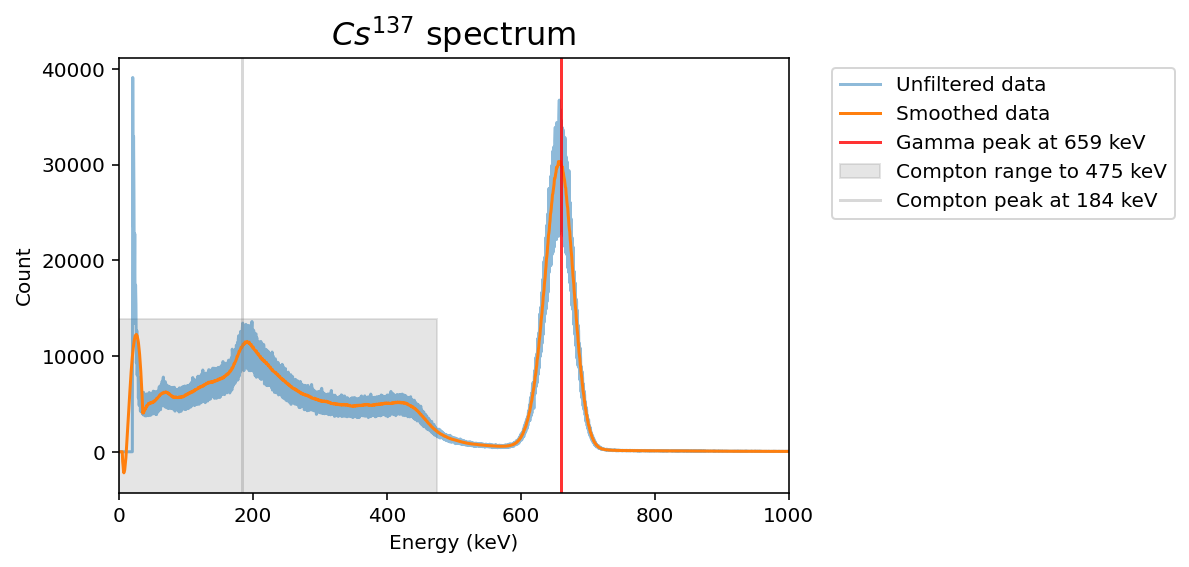

In [4]:
fig, ax = full_plot(data)

ax.set_xlim(0, 1000)

# Defaut values
x_ray_peak = 31 # keV
compton_peak = 184 # keV
gamma_peak = 661 # keV

th_peaks = [x_ray_peak, compton_peak, gamma_peak]

# Peaks (theory)
for peak in th_peaks:
    # ax.axvline(peak, color="green", alpha=0.8)
    pass

ax.set_title(r"$Cs^{137}$ spectrum", fontsize=16)
fig.set_facecolor('white') # Because jupyter is annoying and saves the figure with a no background

# Compute the cobalt 60 file

In [5]:
from calibration import calibrate, get_gamma_peaks, full_plot
from calibration import compton_peak, compton_edge, resolution
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'

file = "spectrum\\Co60_spectrum_range1000_360s-07-09-2023.txt" # File to be analyzed
reference_file = "spectrum\\Cs137_spectrum_range1000_14min-07-09-2023.txt"

In [6]:
# First, calibrate
data = calibrate(file, reference_file)

# Get the gamma peak
dic = get_gamma_peaks(data, peak_nb=2) 

E_g1 = dic['gamma_peak_1']['mu']
E_g2 = dic['gamma_peak_2']['mu']
print(f'Gamma peaks : {E_g1:.2f}, {E_g2:.2f}')

cp_1 = compton_peak(E_g1)
cp_2 = compton_peak(E_g2)
print(f'Compton peaks : {cp_1:.2f}, {cp_2:.2f}')

res_1 = resolution(E_g1, dic['gamma_peak_1']['sigma'])
res_2 = resolution(E_g2, dic['gamma_peak_2']['sigma'])
print(f'Resolutions : {res_1:.2f}, {res_2:.2f}')

R2_1 = dic['gamma_peak_1']['R2']
R2_2 = dic['gamma_peak_2']['R2']
print(f'R2 : {R2_1:.4f}, {R2_2:.4f}')

Gamma peaks : 1163.50, 1320.08
Compton peaks : 209.50, 214.07
Resolutions : 0.08, 0.06
R2 : 0.7695, 0.8909


In [7]:
# Storing the resolutions
Res['Co60'] = {
    'gamma_peak_1' : [E_g1, res_1],
    'gamma_peak_2' : [E_g2, res_2]
}

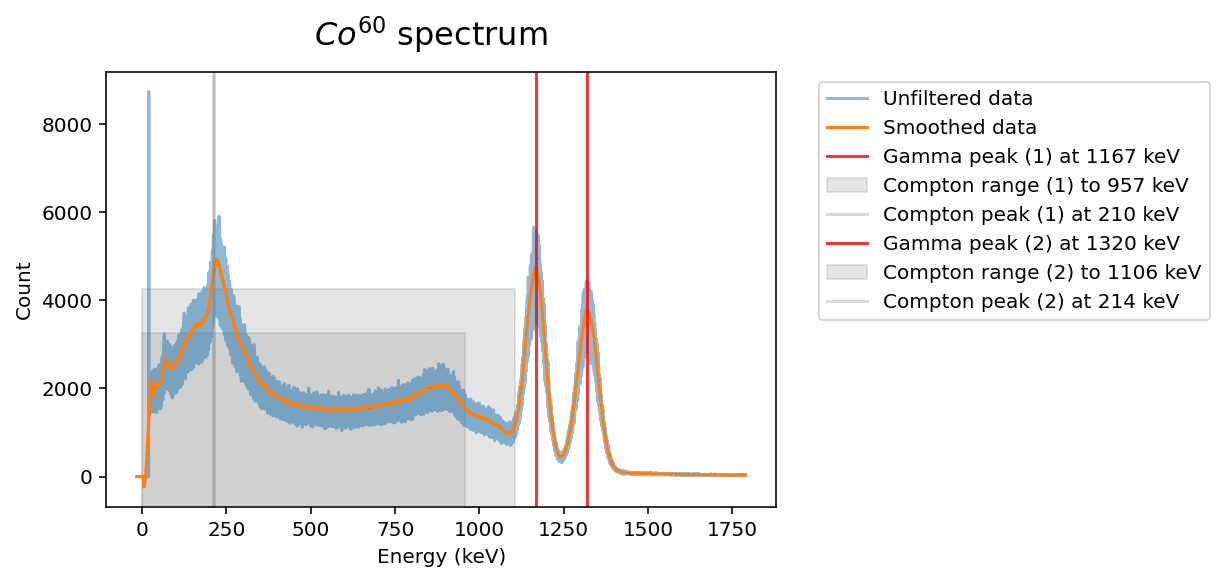

In [8]:
fig, ax = full_plot(data, peak_nb=2)
fig.suptitle(r"$Co^{60}$ spectrum", fontsize=16)
fig.set_facecolor('white') # Because jupyter is annoying and saves the figure with a no background

# Compute the Sodium 22 file

In [9]:
from calibration import calibrate, get_gamma_peaks, full_plot
from calibration import compton_peak, compton_edge, resolution
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'

file = "spectrum\\Na22_spectrum_range1000-07-09-2023.txt" # File to be analyzed
reference_file = "spectrum\\Cs137_spectrum_range1000_14min-07-09-2023.txt"

In [10]:
# First, calibrate
data = calibrate(file, reference_file)

# Get the gamma peak
dic = get_gamma_peaks(data, peak_nb=2, peak_height=100) # Second peak is not a gamma peak but a 511 keV peak due to pair anihilation

E_g1 = dic['gamma_peak_1']['mu']
E_g2 = dic['gamma_peak_2']['mu']
print(f'Gamma peaks : {E_g1:.2f}, {E_g2:.2f}')

cp_1 = compton_peak(E_g1)
cp_2 = compton_peak(E_g2)
print(f'Compton peaks : {cp_1:.2f}, {cp_2:.2f}')

res_1 = resolution(E_g1, dic['gamma_peak_1']['sigma'])
res_2 = resolution(E_g2, dic['gamma_peak_2']['sigma'])
print(f'Resolutions : {res_1:.2f}, {res_2:.2f}')

R2_1 = dic['gamma_peak_1']['R2']
R2_2 = dic['gamma_peak_2']['R2']
print(f'R2 : {R2_1:.4f}, {R2_2:.4f}')

Gamma peaks : 505.97, 1245.07
Compton peaks : 169.77, 212.00
Resolutions : 0.09, 0.06
R2 : 0.9127, 0.9028


In [11]:
# Storing the resolution 
Res['Na22'] = {
    'gamma_peak_1' : [E_g1, res_1],
    'gamma_peak_2' : [E_g2, res_2]
}

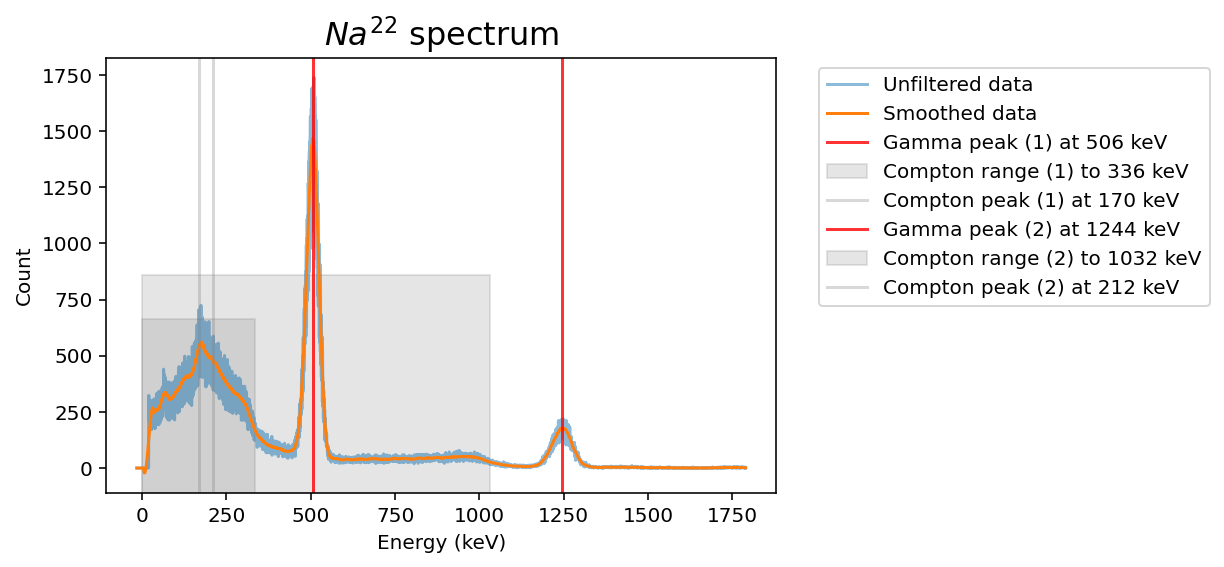

In [12]:
fig, ax = full_plot(data, peak_nb=2, peak_height=100)
ax.set_title(r"$Na^{22}$ spectrum", fontsize=16)
fig.set_facecolor('white') # Because jupyter is annoying and saves the figure with a no background

# Plotting $E_{compton}(E_{\gamma})$

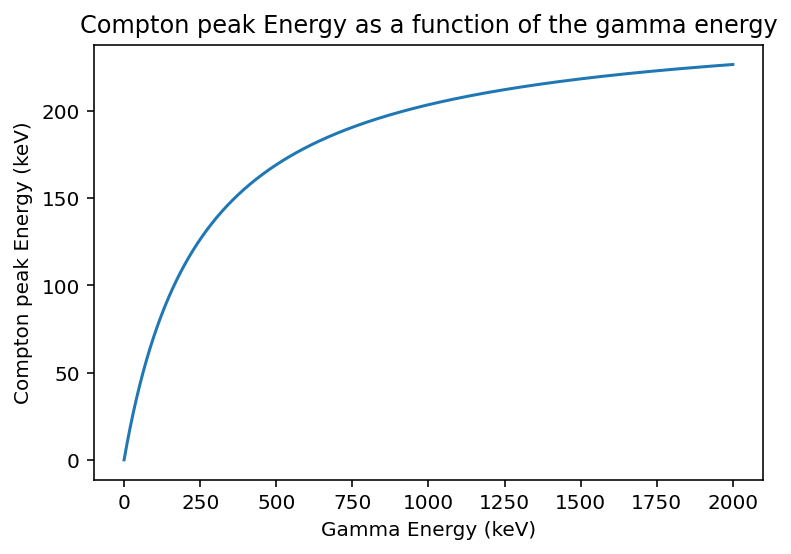

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from calibration import compton_peak

%config InlineBackend.figure_format='retina'

E = np.linspace(0, 2000, 2000)

plt.plot(E, compton_peak(E))

plt.xlabel('Gamma Energy (keV)')
plt.ylabel('Compton peak Energy (keV)')
plt.title('Compton peak Energy as a function of the gamma energy')
plt.gcf().set_facecolor('white') # Because jupyter is annoying and saves the figure with a no background

# Computing Res(E)

In [14]:
# Combining the values
import numpy as np

co_outlier = Res['Co60']['gamma_peak_1'] 
del Res['Co60']['gamma_peak_1']

R_list = []
for key in Res : 
    for res_key in Res[key] :
        R_list.append(Res[key][res_key])        
Res_arr = np.array(R_list)

In [15]:
from scipy.optimize import curve_fit
from calibration import r_squared

def sq_rt(x, a, b) :
    return a / np.sqrt(x) + b

popt, pcov = curve_fit(sq_rt, Res_arr[:,0], Res_arr[:,1])

R2 = r_squared(Res_arr[:,1], sq_rt(Res_arr[:,0], *popt))
print(f"R2 : {R2:.4f}")

R2 : 0.9801


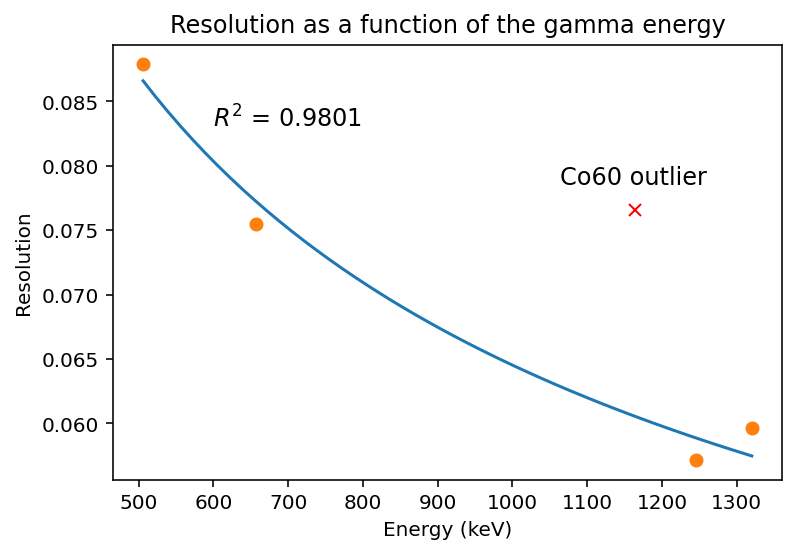

In [16]:
x = np.linspace(np.min(Res_arr[:,0]), np.max(Res_arr[:,0]), 50)
plt.plot(x, sq_rt(x, *popt))

plt.plot(Res_arr[:,0], Res_arr[:,1], 'o')
plt.text(600, 0.083, fr'$R^2$ = {R2:.4f}', fontsize=12)

plt.plot(co_outlier[0], co_outlier[1], 'x', color='red')
plt.text(co_outlier[0]-100, co_outlier[1]+0.002, 'Co60 outlier', fontsize=12)

plt.xlabel('Energy (keV)')
plt.ylabel('Resolution')
plt.title('Resolution as a function of the gamma energy')
plt.gcf().set_facecolor('white') # Because jupyter is annoying and saves the figure with a no background

# Testing with 3 sources at the same time

In [17]:
from calibration import calibrate, get_gamma_peaks, full_plot
from calibration import compton_peak, compton_edge, resolution
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'

file = "spectrum\\3_sources_spectrum_range1000_180s-08-09-2023.txt" # File to be analyzed
reference_file = "spectrum\\Cs137_spectrum_range1000_14min-07-09-2023.txt"

In [18]:
# First, calibrate
data = calibrate(file, reference_file)

nb_peaks = 4

# Get the gamma peak
dic = get_gamma_peaks(data, peak_nb=4, peak_height=1700) # Second peak is not a gamma peak but a 511 keV peak due to pair anihilation

for i in range(nb_peaks):
    pass
E_g1 = dic['gamma_peak_1']['mu']
E_g2 = dic['gamma_peak_2']['mu']
print(f'Gamma peaks : {E_g1:.2f}, {E_g2:.2f}')

cp_1 = compton_peak(E_g1)
cp_2 = compton_peak(E_g2)
print(f'Compton peaks : {cp_1:.2f}, {cp_2:.2f}')

res_1 = resolution(E_g1, dic['gamma_peak_1']['sigma'])
res_2 = resolution(E_g2, dic['gamma_peak_2']['sigma'])
print(f'Resolutions : {res_1:.2f}, {res_2:.2f}')

R2_1 = dic['gamma_peak_1']['R2']
R2_2 = dic['gamma_peak_2']['R2']
print(f'R2 : {R2_1:.4f}, {R2_2:.4f}')

Gamma peaks : 249.13, 689.46
Compton peaks : 126.14, 186.42
Resolutions : 5.58, 0.10
R2 : -0.5287, 0.8487


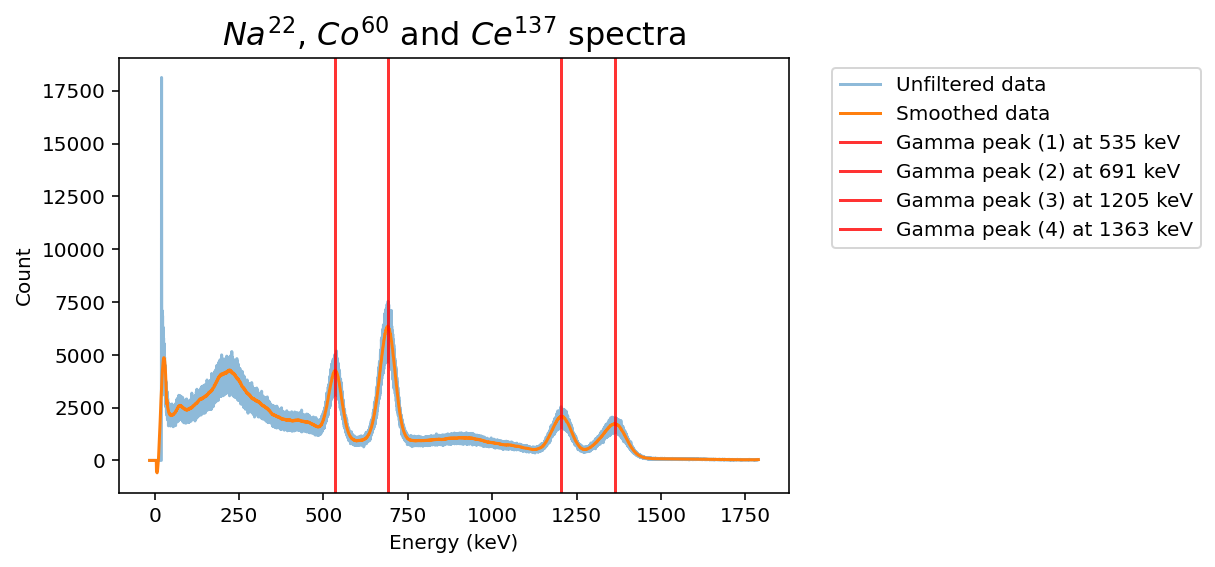

In [19]:
fig, ax = full_plot(data, peak_nb=4, peak_height=1700, do_compton=False)
ax.set_title(r"$Na^{22}$, $Co^{60}$ and $Ce^{137}$ spectra", fontsize=16)
fig.set_facecolor('white') # Because jupyter is annoying and saves the figure with a no background